In [8]:
import pandas as pd
import numpy as np

Pan_train_path = 'pan15-author-profiling-training-dataset-2015-04-23/pan15-author-profiling-training-dataset-english-2015-04-23/'
Pan_test_path = 'pan15-author-profiling-test-dataset-2015-04-23/pan15-author-profiling-test-dataset2-english-2015-04-23/'
# Pan_filetype = 'train'
Pan_train_list = []
Pan_test_list = []
with open(Pan_train_path + 'truth.txt', 'r') as f:
    for line in f.readlines():
        tmp_train_list = line.strip().split(':::')
        Pan_train_list.append(tmp_train_list)
with open(Pan_test_path + 'truth.txt', 'r') as f:
    for line in f.readlines():
        tmp_test_list = line.strip().split(':::')
        Pan_test_list.append(tmp_test_list)
df_Pan_train = pd.DataFrame(Pan_train_list, columns = ['u_id', 'gender', 'age', 'E', 'N', 'A', 'C', 'O'])
df_Pan_test = pd.DataFrame(Pan_test_list, columns = ['u_id', 'gender', 'age', 'E', 'N', 'A', 'C', 'O'])
print(df_Pan_train.head())
print(df_Pan_test.head())

                                   u_id gender    age    E     N     A    C  \
0  3e2cdc34-bffe-4ba7-8bd5-fc07ad904dc1      M  25-34  0.3   0.5   0.1  0.2   
1  b38fee80-2fb1-4481-be25-e8297aae928d      M  25-34  0.2   0.4   0.2  0.0   
2  60468a75-1938-4366-abaa-5ad1cc1b0b8e      M  18-24  0.1   0.2   0.1  0.1   
3  e78b60f0-b114-4238-a0b2-dbd52ab12b99      F  18-24  0.1   0.1  -0.1  0.5   
4  f1dcc4ff-0c7c-4fee-9a65-04a13285f327      F  18-24  0.0  -0.1   0.1  0.3   

     O  
0  0.2  
1  0.2  
2  0.1  
3  0.1  
4  0.4  
                                   u_id gender    age    E    N    A     C  \
0  81db75e5-a2fd-4d42-b1e8-bfb193439f5c      F  25-34  0.4  0.5  0.2   0.2   
1  ba09b307-7bab-4a73-b272-b09503d34627      M  50-XX  0.1  0.1  0.1   0.1   
2  9d4e5977-9217-4dca-be06-f5095ffa1aa0      M  18-24  0.3  0.4  0.2  -0.1   
3  88c6136e-f2bf-4095-8520-0d1717cd6791      M  25-34  0.4  0.4  0.4   0.3   
4  97dc68f2-55ca-499b-ac3d-d7ac9bc6eeaa      F  25-34  0.2  0.0  0.0   0.3   

  

In [12]:
import xmltodict

def get_train_uttr_by_id(uid):
    uttr_xml = open(Pan_train_path + uid + '.xml', 'r')
    xmlDict = xmltodict.parse(uttr_xml.read())
    uttr = '|||'.join(xmlDict['author']['document'])
    uttr_xml.close()
    return uttr
def get_test_uttr_by_id(uid):
    uttr_xml = open(Pan_test_path + uid + '.xml', 'r')
    xmlDict = xmltodict.parse(uttr_xml.read())
    uttr = '|||'.join(xmlDict['author']['document'])
    uttr_xml.close()
    return uttr
            
df_Pan_train['utterance'] = df_Pan_train['u_id'].apply(get_train_uttr_by_id)
df_Pan_test['utterance'] = df_Pan_test['u_id'].apply(get_test_uttr_by_id)
print(df_Pan_train.head())
print(df_Pan_test.head())

                                   u_id gender    age    E     N     A    C  \
0  3e2cdc34-bffe-4ba7-8bd5-fc07ad904dc1      M  25-34  0.3   0.5   0.1  0.2   
1  b38fee80-2fb1-4481-be25-e8297aae928d      M  25-34  0.2   0.4   0.2  0.0   
2  60468a75-1938-4366-abaa-5ad1cc1b0b8e      M  18-24  0.1   0.2   0.1  0.1   
3  e78b60f0-b114-4238-a0b2-dbd52ab12b99      F  18-24  0.1   0.1  -0.1  0.5   
4  f1dcc4ff-0c7c-4fee-9a65-04a13285f327      F  18-24  0.0  -0.1   0.1  0.3   

     O                                          utterance  
0  0.2  How to Test Your Startup Idea for $50 http://t...  
1  0.2  Everyday I come up with a new optimum solution...  
2  0.1  @username @username @username @username  #IfMy...  
3  0.1  I wish we could talk forever.|||100000 things ...  
4  0.4  icarly ^^|||thuis<3|||Homework finished.|||mor...  
                                   u_id gender    age    E    N    A     C  \
0  81db75e5-a2fd-4d42-b1e8-bfb193439f5c      F  25-34  0.4  0.5  0.2   0.2   
1  ba09b3

In [18]:
df_whole = pd.concat([df_Pan_train, df_Pan_test])
df_whole

,u_id,gender,age,E,N,A,C,O,utterance
0,3e2cdc34-bffe-4ba7-8bd5-fc07ad904dc1,M,25-34,0.3,0.5,0.1,0.2,0.2,How to Test Your Startup Idea for $50 http://t...
1,b38fee80-2fb1-4481-be25-e8297aae928d,M,25-34,0.2,0.4,0.2,0.0,0.2,Everyday I come up with a new optimum solution...
2,60468a75-1938-4366-abaa-5ad1cc1b0b8e,M,18-24,0.1,0.2,0.1,0.1,0.1,@username @username @username @username #IfMy...
3,e78b60f0-b114-4238-a0b2-dbd52ab12b99,F,18-24,0.1,0.1,-0.1,0.5,0.1,I wish we could talk forever.|||100000 things ...
4,f1dcc4ff-0c7c-4fee-9a65-04a13285f327,F,18-24,0.0,-0.1,0.1,0.3,0.4,icarly ^^|||thuis<3|||Homework finished.|||mor...
...,...,...,...,...,...,...,...,...,...
137,181ecaeb-78a9-4abe-94f5-08350a004af7,M,25-34,0.1,0.2,0.2,0.2,0.2,Time...commemorative issue http://t.co/DU7SaGi...
138,4aee8558-e6c2-43e4-8fdf-54d90b503cdb,M,35-49,0.0,0.3,0.4,0.3,0.3,Second International Workshop on Privacy and S...
139,783c632c-ea3a-4989-8149-c5078dc647db,M,25-34,0.0,0.1,0.2,0.2,0.1,Dev leaves minor bug in App -> User gives 1-st...
140,db04b2f5-68e1-4822-a21e-4858a6066861,F,18-24,0.2,0.3,0.3,0.2,0.3,I really feel that I'm losing my best friend.....


In [19]:
def get_trait_label(score):
    cls_threshold = 0.2
    if eval(score) >= cls_threshold:
        return 1
    else: return 0

# cAGR,cCON,cEXT,cOPN,cNEU
df_whole['cAGR'] = df_whole['A'].apply(get_trait_label)
df_whole['cCON'] = df_whole['C'].apply(get_trait_label)
df_whole['cEXT'] = df_whole['E'].apply(get_trait_label)
df_whole['cOPN'] = df_whole['O'].apply(get_trait_label)
df_whole['cNEU'] = df_whole['N'].apply(get_trait_label)


# 这里可以通过查看正负样本比来确定上面的 cls_threshold
print(df_whole['cAGR'].value_counts())
print(df_whole['cCON'].value_counts())
print(df_whole['cEXT'].value_counts())
print(df_whole['cOPN'].value_counts())
print(df_whole['cNEU'].value_counts())
df_whole

0    151
1    143
Name: cAGR, dtype: int64
1    152
0    142
Name: cCON, dtype: int64
1    152
0    142
Name: cEXT, dtype: int64
1    197
0     97
Name: cOPN, dtype: int64
1    156
0    138
Name: cNEU, dtype: int64


,u_id,gender,age,E,N,A,C,O,utterance,cAGR,cCON,cEXT,cOPN,cNEU
0,3e2cdc34-bffe-4ba7-8bd5-fc07ad904dc1,M,25-34,0.3,0.5,0.1,0.2,0.2,How to Test Your Startup Idea for $50 http://t...,0,1,1,1,1
1,b38fee80-2fb1-4481-be25-e8297aae928d,M,25-34,0.2,0.4,0.2,0.0,0.2,Everyday I come up with a new optimum solution...,1,0,1,1,1
2,60468a75-1938-4366-abaa-5ad1cc1b0b8e,M,18-24,0.1,0.2,0.1,0.1,0.1,@username @username @username @username #IfMy...,0,0,0,0,1
3,e78b60f0-b114-4238-a0b2-dbd52ab12b99,F,18-24,0.1,0.1,-0.1,0.5,0.1,I wish we could talk forever.|||100000 things ...,0,1,0,0,0
4,f1dcc4ff-0c7c-4fee-9a65-04a13285f327,F,18-24,0.0,-0.1,0.1,0.3,0.4,icarly ^^|||thuis<3|||Homework finished.|||mor...,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,181ecaeb-78a9-4abe-94f5-08350a004af7,M,25-34,0.1,0.2,0.2,0.2,0.2,Time...commemorative issue http://t.co/DU7SaGi...,1,1,0,1,1
138,4aee8558-e6c2-43e4-8fdf-54d90b503cdb,M,35-49,0.0,0.3,0.4,0.3,0.3,Second International Workshop on Privacy and S...,1,1,0,1,1
139,783c632c-ea3a-4989-8149-c5078dc647db,M,25-34,0.0,0.1,0.2,0.2,0.1,Dev leaves minor bug in App -> User gives 1-st...,1,1,0,0,0
140,db04b2f5-68e1-4822-a21e-4858a6066861,F,18-24,0.2,0.3,0.3,0.2,0.3,I really feel that I'm losing my best friend.....,1,1,1,1,1


In [20]:
# plot personality counts
df_labels = df_whole[['cAGR','cCON','cEXT','cOPN','cNEU']]
df_counts = pd.DataFrame([])
df_counts['AGR'] = df_labels['cAGR'].value_counts().reset_index()['cAGR']
df_counts['CON'] = df_labels['cCON'].value_counts().reset_index()['cCON']
df_counts['EXT'] = df_labels['cEXT'].value_counts().reset_index()['cEXT']
df_counts['OPN'] = df_labels['cOPN'].value_counts().reset_index()['cOPN']
df_counts['NEU'] = df_labels['cNEU'].value_counts().reset_index()['cNEU']
df_counts

,AGR,CON,EXT,OPN,NEU
0,151,152,152,197,156
1,143,142,142,97,138


In [21]:
print((df_counts[0:1]/df_counts.sum()).round(decimals=3))
print((df_counts[1:2]/df_counts.sum()).round(decimals=3))

     AGR    CON    EXT   OPN    NEU
0  0.514  0.517  0.517  0.67  0.531
     AGR    CON    EXT   OPN    NEU
1  0.486  0.483  0.483  0.33  0.469


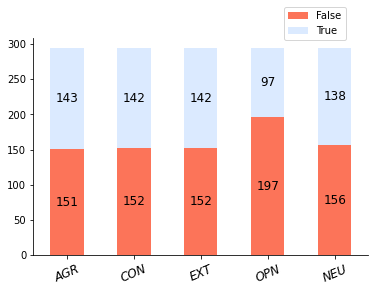

In [22]:
# plot data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize

import seaborn as sns

df_counts.index = (['False', 'True'])
ax = df_counts.T.plot.bar(stacked=True, color=['#FC7459', '#DBEAFF'])
# ax.color_palette("pastel")
# annotate the bars
for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

ax.set_xticklabels(df_counts.columns, rotation=23, fontsize=12, fontstyle='oblique', fontweight='550')
ax.legend(bbox_to_anchor=(0.75, 0.99), loc=0, borderaxespad=0.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.savefig('plot/essay_personality.png', dpi=300)


In [25]:
df_whole['sample_length'] = df_whole['utterance'].apply(lambda x: len(x.split(' ')))
df_whole['sample_length'].describe()

count     294.000000
mean     1015.068027
std       339.801802
min       244.000000
25%       834.000000
50%      1021.500000
75%      1199.500000
max      1886.000000
Name: sample_length, dtype: float64

In [26]:
# split data and output tsv
for index, row in df_whole.iteritems():
    if index == 'cEXT':
        df_Pan_E = df_whole[['utterance','cEXT']]
        df_Pan_E.rename(columns={'cEXT':'labels'},inplace=True)
        df_Pan_E.to_csv('Pan_E_whole.tsv',sep = '\t')
    elif index == 'cNEU':
        df_Pan_N = df_whole[['utterance','cNEU']]
        df_Pan_N.rename(columns={'cNEU':'labels'},inplace=True)
        df_Pan_N.to_csv('Pan_N_whole.tsv',sep = '\t')
    elif index == 'cAGR':
        df_Pan_A = df_whole[['utterance','cAGR']]
        df_Pan_A.rename(columns={'cAGR':'labels'},inplace=True)
        df_Pan_A.to_csv('Pan_A_whole.tsv',sep = '\t')
    elif index == 'cCON':
        df_Pan_C = df_whole[['utterance','cCON']]
        df_Pan_C.rename(columns={'cCON':'labels'},inplace=True)
        df_Pan_C.to_csv('Pan_C_whole.tsv',sep = '\t')
    elif index == 'cOPN':
        df_Pan_O = df_whole[['utterance','cOPN']]
        df_Pan_O.rename(columns={'cOPN':'labels'},inplace=True)
        df_Pan_O.to_csv('Pan_O_whole.tsv',sep = '\t')

/home/zhiyuan/ENTER/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
